# DBI Project Student
#### Student alcohol consumption dataset
[Link to source](https://www.kaggle.com/uciml/student-alcohol-consumption)
Walc...alcohol consumed on weekend
Dalc...alcohol consumed on workday

[Link to academic 
portuguese grading system](https://en.wikipedia.org/wiki/Academic_grading_in_Portugal)
Basically G1, G2, G3 are test scores from 0(bad) to 20(excellent)

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [380]:
df = pd.read_csv('./data/student-mat.csv', sep=',')
#not working
#df.drop(['school', 'guardian', 'traveltime', 'famsize', 'activities', 'famsup', 'schoolsup'])

### Columns

In [381]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### Examples

In [382]:
#Numeric types
df.select_dtypes(include='number').head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [383]:
df.select_dtypes(exclude='number').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


### Statistics

In [384]:
df.select_dtypes(include='number').describe()
#only numeric values are shown

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [385]:
df.select_dtypes(exclude='number').describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


### Age distribution

Text(0.5, 1.0, 'Age distribution')

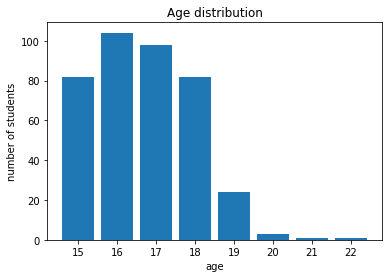

In [386]:
age_data = df["age"].to_numpy()
age_label, age_value = np.unique(age_data, return_counts=True)

plt.bar(age_label.astype(str), age_value)
plt.xlabel("age")
plt.ylabel("number of students")
plt.title("Age distribution")

In [387]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

predicted_col = 'G3'

In [388]:
dataset = df.select_dtypes(include='number')

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

dataset_stats = dataset.describe()
dataset_stats.pop(predicted_col)
dataset_stats = dataset_stats.transpose()

train_labels = train_dataset.pop(predicted_col)
test_labels = test_dataset.pop(predicted_col)
# TODO put lower without harming stucture
train_dataset.shape

(316, 15)

In [389]:


def norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']
train_normed = norm(train_dataset)
test_normed = norm(test_dataset)
train_normed.shape

(316, 15)

In [390]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(10e-5)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [391]:
model = build_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 64)                1024      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 65        
Total params: 9,409
Trainable params: 9,409
Non-trainable params: 0
___________________________________________________

In [392]:
EPOCHS = 1500

history = model.fit(
  np.asarray(train_normed), np.asarray(train_labels),
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])




Epoch: 0, loss:118.5458,  mae:9.8951,  mse:118.5458,  val_loss:135.0262,  val_mae:10.9209,  val_mse:135.0262,  
....................................................................................................
Epoch: 100, loss:7.8296,  mae:2.1921,  mse:7.8296,  val_loss:6.3324,  val_mae:1.8334,  val_mse:6.3324,  
....................................................................................................
Epoch: 200, loss:3.9844,  mae:1.4927,  mse:3.9844,  val_loss:5.3975,  val_mae:1.7021,  val_mse:5.3975,  
....................................................................................................
Epoch: 300, loss:2.1209,  mae:1.0599,  mse:2.1209,  val_loss:5.3256,  val_mae:1.7069,  val_mse:5.3256,  
....................................................................................................
Epoch: 400, loss:1.0832,  mae:0.7351,  mse:1.0832,  val_loss:5.3528,  val_mae:1.7270,  val_mse:5.3528,  
...............................................................

In [393]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1495,0.002291,0.041712,0.002291,6.949670,1.987434,6.949670,1495
1496,0.003583,0.047511,0.003583,6.893588,1.985245,6.893588,1496
1497,0.003096,0.049972,0.003096,6.911046,1.984515,6.911046,1497
1498,0.001797,0.035890,0.001797,6.904112,1.984031,6.904112,1498
1499,0.005154,0.060064,0.005154,6.915100,1.991922,6.915100,1499


Text(0, 0.5, 'MAE [MPG]')

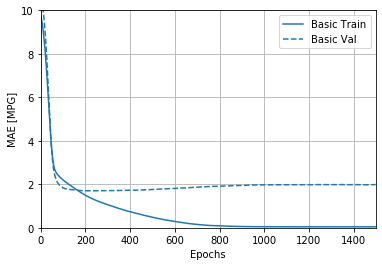

In [394]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [411]:
test_predictions = model.predict(np.asarray(test_normed)).flatten()

In [430]:
m = tf.keras.metrics.MeanSquaredError(dtype=tf.float32)
m.update_state(np.asarray(test_labels), np.asarray(test_predictions))
m.result().numpy()

3.9446535

In [432]:
comparisons = zip(np.array(test_labels), np.array(test_predictions))
for comparison in comparisons:
    print(comparison)

(15, 16.930399)
(8, 10.557955)
(11, 9.7758465)
(17, 14.601671)
(16, 16.57814)
(11, 11.174749)
(13, 13.685875)
(18, 16.487638)
(20, 19.408295)
(11, 11.2176075)
(15, 14.413715)
(15, 15.091836)
(5, 3.1880517)
(6, 6.126709)
(10, 11.4931965)
(14, 16.491606)
(10, 9.319504)
(18, 18.34555)
(8, 7.2281084)
(11, 11.4751)
(16, 14.994476)
(13, 13.622713)
(13, 11.610492)
(15, 15.77615)
(9, 2.263262)
(0, 1.0597198)
(0, 2.865062)
(11, 11.102781)
(14, 14.044397)
(10, 11.081999)
(12, 12.3907585)
(10, 11.674896)
(9, 10.836231)
(6, 6.2185025)
(8, 11.89377)
(11, 10.548515)
(8, 10.657829)
(10, 8.89828)
(15, 14.425671)
(10, 5.7696486)
(10, 7.916741)
(6, 7.449387)
(13, 10.87063)
(0, 2.3443124)
(12, 11.673325)
(0, -3.1800573)
(10, 8.331248)
(11, 12.679724)
(12, 11.53234)
(17, 14.7016735)
(11, 8.318242)
(14, 13.602032)
(9, 9.301386)
(11, 10.826276)
(14, 16.248552)
(11, 11.363715)
(15, 15.586882)
(13, 11.823951)
(13, 16.343054)
(9, 9.860624)
(15, 14.69616)
(0, 3.2001266)
(15, 15.062508)
(0, 4.5096116)
(17, 16.47